Quantum Gibbs Sampling Circuit:
        ┌───┐     ┌─────────┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ Rz(π/4) ├─░─┤M├───
        └───┘┌─┴─┐└─────────┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├────────────░──╫─┤M├
             └───┘            ░  ║ └╥┘
meas: 2/═════════════════════════╩══╩═
                                 0  1 
Quantum Gibbs Sampling Result: {'11': 486, '00': 514}


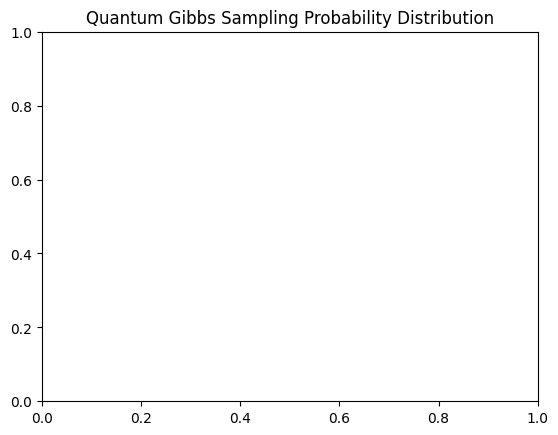

In [1]:
#-------------------------------------------------------------------------
# Quantum Gibbs Sampling 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

from numpy import pi
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------

# Define a simple Hamiltonian H = Z1 + Z2 + X1X2
qc = QuantumCircuit(2)

# Apply thermal relaxation (approximation)
qc.h(0)           # Create superposition
qc.cx(0, 1)       # Entangle qubits
qc.rz(pi / 4., 0)  # Apply rotation to simulate inverse temperature effect
qc.measure_all()

# Print the quantum circuit
print("Quantum Gibbs Sampling Circuit:")
print(qc)
qc.draw('mpl')  # Graphically display the circuit

# Simulate the circuit
backend = Aer.get_backend('aer_simulator')
result  = execute(qc, backend, shots=1000).result()
counts  = result.get_counts()

# Print results
print("Quantum Gibbs Sampling Result:", counts)

# Visualize the measurement results
plot_histogram(counts)
plt.title("Quantum Gibbs Sampling Probability Distribution")
plt.show()
